# Analysing and Tracking the Sentiment and Topics on Social Media 
- COSC2671: Social Media and Network Analytics 
- Tony Smith: s3972733 

In [1]:
import praw
%load_ext autoreload
%autoreload 1
%aimport redditClient
from redditClient import redditClient
from collections import Counter
from datetime import datetime
from time import sleep
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import numpy as np
import math

In [15]:
client = redditClient()
sSubredditName = 'games'

# Data Collection
- Collects data from a few subredddits
    - r/all
    - r/GamingLeaksAndRumours
    - r/PCGaming
    - r/PCMasterrace
    - r/Popular
    - r/TrueGaming

- with "Baldur's Gate 3"


In [ ]:
# Doe
keyword = "Baldur's Gate 3"
subreddit = client.subreddit('popular')  # Replace with your subreddit name

data = []  # This list will store dictionaries

for submission in subreddit.search(keyword, limit=None):
    try:
        # Try to replace all MoreComments objects
        submission.comments.replace_more(limit=None)
    except praw.exceptions.APIException as e:
        print("Encountered an API error:", e)
        sleep(60)
        continue  # Skip to next submission if an error occurs
    except Exception as e:  # General exception to catch other possible issues
        print("Encountered a general error:", e)
        sleep(60)
        continue  # Skip to next submission if an error occurs

    for comment in submission.comments.list(): # Create the dictionary with title, url, upvotes, submissiondate, and commentdate
        entry = {
            'Title': submission.title,
            'URL': submission.url,
            'Upvotes': submission.score,
            'Comment': comment.body,
            'SubmissionDate': datetime.utcfromtimestamp(submission.created_utc).strftime('%Y-%m-%d %H:%M:%S'),
            'CommentDate': datetime.utcfromtimestamp(comment.created_utc).strftime('%Y-%m-%d %H:%M:%S'),
        }
        data.append(entry)



In [ ]:
# Convert the list of dictionaries into a DataFrame
df = pd.DataFrame(data)
# df.to_csv('reddit_dataPopular.csv', index=False)
df = pd.DataFrame(data)
df.head()

,Title,URL,Upvotes,Comment,SubmissionDate,CommentDate
0,Baldur's Gate 3 Proves That Pretty Much Everyo...,https://www.vg247.com/baldurs-gate-3-steam-lau...,19684,I don't think anyone wants micro transactions,2023-08-04 19:24:06,2023-08-04 20:22:09
1,Baldur's Gate 3 Proves That Pretty Much Everyo...,https://www.vg247.com/baldurs-gate-3-steam-lau...,19684,Co op is a big part for me,2023-08-04 19:24:06,2023-08-04 20:08:17
2,Baldur's Gate 3 Proves That Pretty Much Everyo...,https://www.vg247.com/baldurs-gate-3-steam-lau...,19684,[removed],2023-08-04 19:24:06,2023-08-04 20:55:22
3,Baldur's Gate 3 Proves That Pretty Much Everyo...,https://www.vg247.com/baldurs-gate-3-steam-lau...,19684,This was something that absolutely didn't need...,2023-08-04 19:24:06,2023-08-04 20:36:36
4,Baldur's Gate 3 Proves That Pretty Much Everyo...,https://www.vg247.com/baldurs-gate-3-steam-lau...,19684,I want multiplayer rpgs with no micro transact...,2023-08-04 19:24:06,2023-08-04 19:53:47


# EDA

In [16]:
# Read the CSV file into a DataFrame
# Convert the 'SubmissionDate' and 'CommentDate' columns to datetime format
f1.SubmissionDate = pd.to_datetime(f1.SubmissionDate)
f1 = pd.read_csv('reddit_dataALL.csv')
f1.SubmissionDate = pd.to_datetime(f1.SubmissionDate)
f1.CommentDate = pd.to_datetime(f1.CommentDate)

f2 = pd.read_csv('reddit_dataGamingLeaksAndRumours.csv')
f2.SubmissionDate = pd.to_datetime(f2.SubmissionDate)
f2.CommentDate = pd.to_datetime(f2.CommentDate)

f3 = pd.read_csv('reddit_dataPC2.csv') # Test Sample vs Laptop
f3.rename(columns={'Submission Date':'SubmissionDate', 'Comment Date':'CommentDate'}, inplace=True)
f3.SubmissionDate = pd.to_datetime(f3.SubmissionDate)
f3.CommentDate = pd.to_datetime(f3.CommentDate)

f4 = pd.read_csv('reddit_dataPCGaming.csv')
f4.SubmissionDate = pd.to_datetime(f4.SubmissionDate)
f4.CommentDate = pd.to_datetime(f4.CommentDate)

f5 = pd.read_csv('reddit_dataPCMasterrace.csv')
f5.SubmissionDate = pd.to_datetime(f5.SubmissionDate)
f5.CommentDate = pd.to_datetime(f5.CommentDate)

f6 = pd.read_csv('reddit_dataPopular.csv')
f6.SubmissionDate = pd.to_datetime(f6.SubmissionDate)
f6.CommentDate = pd.to_datetime(f6.CommentDate)

f7 = pd.read_csv('reddit_dataTrueGaming.csv')
f7.SubmissionDate = pd.to_datetime(f7.SubmissionDate)
f7.CommentDate = pd.to_datetime(f7.CommentDate)

# Concatenate all the individual DataFrames into one DataFrame called dfall
dfall = pd.concat([f1,f2,f4,f5,f6,f7])

# Convert the 'Upvotes' column to numeric format, setting errors='coerce' to handle non-numeric values
dfall['Upvotes'] = pd.to_numeric(dfall['Upvotes'], errors='coerce')

# Convert the 'Comment' column to string format
dfall['Comment'] = dfall['Comment'].astype(str)

# Uncomment the following line to save the concatenated DataFrame to a new CSV file
# dfall.to_csv('reddit_dataTotal.csv', index=False) 

In [40]:
# Checking if anything was lost~
dfall.head()
print(dfall['SubmissionDate'].min())
print(dfall['SubmissionDate'].max())

2011-07-11 22:59:00
2023-08-17 18:36:26


In [41]:
dfall.shape # How many rows?

(229981, 6)

# Skipping the Process Phase and Just Loading in the Combined Dataset

In [24]:

alldf = pd.read_csv('reddit_dataALL.csv')
alldf.head()

,Title,URL,Upvotes,Comment,SubmissionDate,CommentDate
0,Baldur's Gate 3 - Review Thread,https://www.reddit.com/r/Games/comments/15h6o6...,2760,Updating the OP as the reviews are coming in. ...,2023-08-03 15:02:24,2023-08-03 15:04:00
1,Baldur's Gate 3 - Review Thread,https://www.reddit.com/r/Games/comments/15h6o6...,2760,Review codes have only been out for a few days...,2023-08-03 15:02:24,2023-08-03 15:06:05
2,Baldur's Gate 3 - Review Thread,https://www.reddit.com/r/Games/comments/15h6o6...,2760,Take into consideration review copies got push...,2023-08-03 15:02:24,2023-08-03 15:08:56
3,Baldur's Gate 3 - Review Thread,https://www.reddit.com/r/Games/comments/15h6o6...,2760,It leaked earlier but ACG said he spent 20 hou...,2023-08-03 15:02:24,2023-08-03 15:06:23
4,Baldur's Gate 3 - Review Thread,https://www.reddit.com/r/Games/comments/15h6o6...,2760,"As expected, sounds like Act 1 at the very lea...",2023-08-03 15:02:24,2023-08-03 15:17:52


# Need to make sure all text is lowercase for modeling

In [25]:
for col in alldf.columns:
    if alldf[col].dtype == 'object':
        alldf[col] = alldf[col].apply(lambda x: x.lower())
alldf.head()

,Title,URL,Upvotes,Comment,SubmissionDate,CommentDate
0,baldur's gate 3 proves that pretty much everyo...,https://www.vg247.com/baldurs-gate-3-steam-lau...,19680,i don't think anyone wants micro transactions,2023-08-04 19:24:06,2023-08-04 20:22:09
1,baldur's gate 3 proves that pretty much everyo...,https://www.vg247.com/baldurs-gate-3-steam-lau...,19680,co op is a big part for me,2023-08-04 19:24:06,2023-08-04 20:08:17
2,baldur's gate 3 proves that pretty much everyo...,https://www.vg247.com/baldurs-gate-3-steam-lau...,19680,[removed],2023-08-04 19:24:06,2023-08-04 20:55:22
3,baldur's gate 3 proves that pretty much everyo...,https://www.vg247.com/baldurs-gate-3-steam-lau...,19680,this was something that absolutely didn't need...,2023-08-04 19:24:06,2023-08-04 20:36:36
4,baldur's gate 3 proves that pretty much everyo...,https://www.vg247.com/baldurs-gate-3-steam-lau...,19680,i want multiplayer rpgs with no micro transact...,2023-08-04 19:24:06,2023-08-04 19:53:47


# Data types need to be changed for graphing

In [26]:
dfall.dtypes
dfall.SubmissionDate = pd.to_datetime(dfall.SubmissionDate)
dfall.CommentDate = pd.to_datetime(dfall.CommentDate)
dfall.dtypes


Title                        object
URL                          object
Upvotes                       int64
Comment                      object
SubmissionDate       datetime64[ns]
CommentDate          datetime64[ns]
Processed_Comment            object
dtype: object

After conversion:
2011-07-11 22:59:00
2023-08-17 18:36:26
   SubmissionDate  Total Submissions  Year
0      2011-12-31                 17  2011
1      2012-12-31                 68  2012
2      2013-12-31                 29  2013
3      2014-12-31                 20  2014
4      2015-12-31                 29  2015
5      2016-12-31                 32  2016
6      2017-12-31                 14  2017
7      2018-12-31                 25  2018
8      2019-12-31                 32  2019
9      2020-12-31                124  2020
10     2021-12-31                 82  2021
11     2022-12-31                 58  2022
12     2023-12-31                495  2023
                                               Title  \
0  Baldur's Gate 3 Proves That Pretty Much Everyo...   
1  There's no running from the critically acclaim...   
2  Baldur's Gate 3 reviews look great. (P.S.: A s...   
3  Warning 1337 no longer safe, Baldur's Gate 3 i...   
4  "Try Baldur's Gate 3," they said. "It'll be fu...   

   

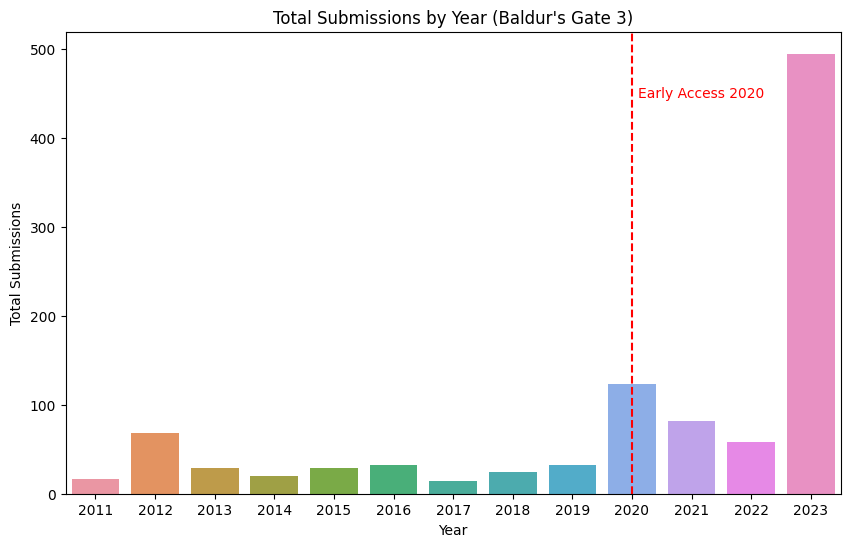

In [27]:
# Convert the 'SubmissionDate' column in the DataFrame 'dfall' to datetime format
dfall['SubmissionDate'] = pd.to_datetime(dfall['SubmissionDate'])

# Debugging: Print the minimum and maximum dates in the 'SubmissionDate' column to verify the conversion
print("After conversion:")
print(dfall['SubmissionDate'].min())
print(dfall['SubmissionDate'].max())

# Remove duplicate rows based on the 'Title' column, keeping only the first occurrence of each title
# Reset the index after dropping duplicates
dupedf = dfall.drop_duplicates(
  subset = ['Title'],
  keep = 'first').reset_index(drop = True)

# Group the DataFrame by year using the 'SubmissionDate' column and count the number of submissions for each year
# Reset the index and name the new column as 'Total Submissions'
df_grouped_by_year = dupedf.groupby(pd.Grouper(key='SubmissionDate', freq='Y')).size().reset_index(name='Total Submissions')

# Extract just the year from the 'SubmissionDate' column for plotting purposes
df_grouped_by_year['Year'] = df_grouped_by_year['SubmissionDate'].dt.year

# Debugging: Print the DataFrame grouped by year to check the data
print(df_grouped_by_year)
print(dupedf.head())

# Create a bar plot using Seaborn to visualize the total number of submissions by year
plt.figure(figsize=(10, 6))
sns.barplot(x='Year', y='Total Submissions', data=df_grouped_by_year)
plt.xlabel('Year')
plt.ylabel('Total Submissions')
plt.title('Total Submissions by Year (Baldur\'s Gate 3)')

# Draw a vertical dashed red line at the year 2020 to indicate the start of Early Access
line_x_position = df_grouped_by_year[df_grouped_by_year['Year'] == 2020].index[0]
plt.axvline(x=line_x_position, color='r', linestyle='--', label='Early Access 2020')

# Add text near the vertical line to label it as 'Early Access 2020'
text_y_position = max(df_grouped_by_year['Total Submissions']) * 0.9  # 90% of the maximum y-value for positioning the text
plt.text(line_x_position + .1, text_y_position, 'Early Access 2020', rotation=0, color='red')

# Display the plot
plt.show()


After conversion:
2011-07-11 23:06:51
2023-08-18 03:31:58
   CommentDate  Total Comments  Year
0   2011-12-31             750  2011
1   2012-12-31            4548  2012
2   2013-12-31            2340  2013
3   2014-12-31            1096  2014
4   2015-12-31            3503  2015
5   2016-12-31            1264  2016
6   2017-12-31             945  2017
7   2018-12-31            1006  2018
8   2019-12-31            4840  2019
9   2020-12-31           16519  2020
10  2021-12-31            5596  2021
11  2022-12-31            5330  2022
12  2023-12-31          182244  2023


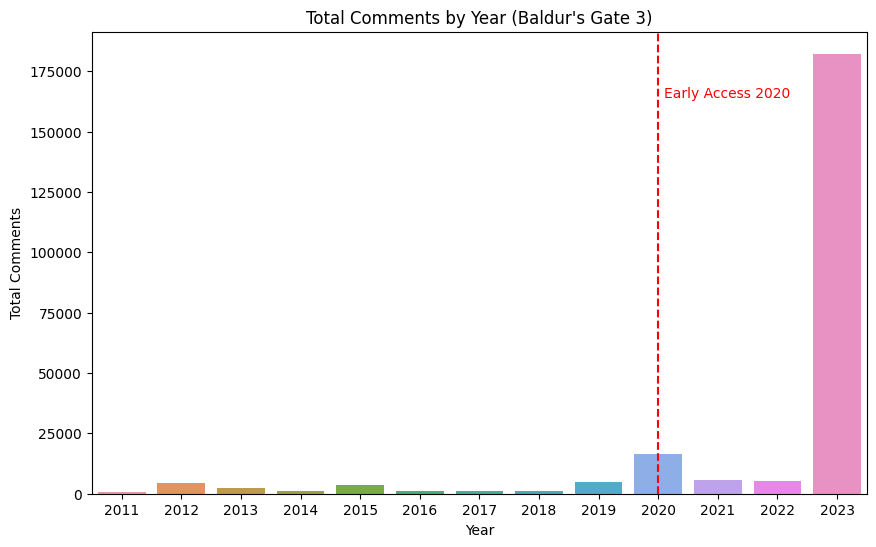

In [47]:
# Convert the 'CommentDate' column in the DataFrame 'dfall' to datetime format
dfall['SubmissionDate'] = pd.to_datetime(dfall['SubmissionDate'])

# Debugging: Print the minimum and maximum dates in the 'CommentDate' column to verify the conversion
print("After conversion:")
print(dfall['CommentDate'].min())
print(dfall['CommentDate'].max())

# Remove duplicate rows based on the 'CommentDate' column, keeping only the first occurrence of each date
# Reset the index after dropping duplicates
dupedf = dfall.drop_duplicates(
  subset = ['CommentDate'],
  keep = 'first').reset_index(drop = True)

# Group the DataFrame by year using the 'CommentDate' column and count the number of comments for each year
# Reset the index and name the new column as 'Total Comments'
df_grouped_by_year = dfall.groupby(pd.Grouper(key='CommentDate', freq='Y')).size().reset_index(name='Total Comments')

# Extract just the year from the 'CommentDate' column for plotting purposes
df_grouped_by_year['Year'] = df_grouped_by_year['CommentDate'].dt.year

# Debugging: Print the DataFrame grouped by year to check the data
print(df_grouped_by_year)

# Create a bar plot using Seaborn to visualize the total number of comments by year
plt.figure(figsize=(10, 6))
sns.barplot(x='Year', y='Total Comments', data=df_grouped_by_year)
plt.xlabel('Year')
plt.ylabel('Total Comments')
plt.title('Total Comments by Year (Baldur\'s Gate 3)')

# Draw a vertical dashed red line at the year 2020 to indicate the start of Early Access
line_x_position = df_grouped_by_year[df_grouped_by_year['Year'] == 2020].index[0]
plt.axvline(x=line_x_position, color='r', linestyle='--', label='Early Access 2020')

# Add text near the vertical line to label it as 'Early Access 2020'
text_y_position = max(df_grouped_by_year['Total Comments']) * 0.9  # 90% of the maximum y-value for positioning the text
plt.text(line_x_position + .1, text_y_position, 'Early Access 2020', rotation=0, color='red')

# Display the plot
plt.show()


# Most Upvoted Submissions

In [28]:
# Set the maximum column width to 'None' so that the entire content of each cell in the DataFrame is displayed when printed
pd.set_option('display.max_colwidth', None)

# Remove duplicate rows based on the 'Title' column, keeping only the first occurrence of each title
# Reset the index after dropping duplicates
dupedf = dfall.drop_duplicates(
  subset = ['Title'],
  keep = 'first').reset_index(drop = True)

# Sort the DataFrame 'dupedf' by the 'Upvotes' column in descending order and select the top 11 rows
# Store this sorted DataFrame in a new variable called 'bestcomment'
bestcomment = dupedf.sort_values('Upvotes', ascending=False).head(11)

# Display the top 10 rows of the 'bestcomment' DataFrame
bestcomment.head(10)


,Title,URL,Upvotes,Comment,SubmissionDate,CommentDate,Processed_Comment
7,AAA Studios In 2023 After Baldurs Gate 3 Launch,https://i.redd.it/3923o6vwangb1.png,31388,"Welcome everyone from r/all! Please remember:\n\n1 - You too can be part of the PCMR! You don't even need a PC. You just need to love PCs! It's not about the hardware in your rig, but the software in your heart! Your age, nationality, race, gender, sexuality, religion (or lack of), political affiliation, economic status and PC specs are irrelevant. If you love or want to learn about PCs, you can be part of our community! All are welcome!\n\n2 - If you're not a PC gamer because you think it's expensive, know that it is possible to build a competent gaming PC for a lower price than you think. Check http://www.pcmasterrace.org for our builds and don't be afraid to post here asking for tips and help!\n\n3 - Join our efforts to get as many PCs worldwide to help the folding@home effort, in fighting against Cancer, Covid, Alzheimer's, Parkinson's and more: https://pcmasterrace.org/folding\n\n4 - We're running the biggest giveaway of the year so far! Be one of the 55 lucky winners that will take home several MSI PC Hardware sets (CPU, Graphics Card, Monitor, etc) to join the PCMR or upgrade your existing system + lots of other goodies: https://www.reddit.com/r/pcmasterrace/comments/155xlyj/pick_your_favorite_pc_parts_create_a_dream_pc/\n\n-----------\n\nFeel free to post about any kind of doubt you might have about becoming a PC user or any other PC related question. That kind of content is not only allowed but welcome! We also have a [Daily Simple Questions Megathread](https://www.reddit.com/r/pcmasterrace/search?q=Simple+Questions+Thread+subreddit%3Apcmasterrace+author%3AAutoModerator&restrict_sr=on&sort=new&t=all) for your simplest questions. No question is too dumb!\n\nWelcome to the PCMR.",2023-08-07 08:04:25,2023-08-07 15:06:14,"welcom everyon r/all! pleas remember: 1 - part pcmr! even need pc. need love pcs! hardwar rig, softwar heart! age, nationality, race, gender, sexuality, religion (or lack of), polit affiliation, econom statu pc spec irrelevant. love want learn pcs, part community! welcome! 2 - pc gamer think expensive, know possibl build compet game pc lower price think. check http://www.pcmasterrace.org build afraid post ask tip help! 3 - join effort get mani pc worldwid help folding@hom effort, fight cancer, covid, alzheimer's, parkinson' more: https://pcmasterrace.org/fold 4 - we'r run biggest giveaway year far! one 55 lucki winner take home sever msi pc hardwar set (cpu, graphic card, monitor, etc) join pcmr upgrad exist system + lot goodies: https://www.reddit.com/r/pcmasterrace/comments/155xlyj/pick_your_favorite_pc_parts_create_a_dream_pc/ ----------- feel free post kind doubt might becom pc user pc relat question. kind content allow welcome! also [daili simpl question megathread](https://www.reddit.com/r/pcmasterrace/search?q=simple+questions+thread+subreddit%3apcmasterrace+author%3aautomoderator&restrict_sr=on&sort=new&t=all) simplest questions. question dumb! welcom pcmr."
0,Baldur's Gate 3 Proves That Pretty Much Everyone Still Wants Single-Player RPGs With No Microtransactions.,https://www.vg247.com/baldurs-gate-3-steam-launch-record-second-biggest-2023,19680,I don't think anyone wants micro transactions,2023-08-04 19:24:06,2023-08-04 20:22:09,think anyon want micro transact
10,Swen on the success of Baldur's Gate 3,https://i.redd.it/0hy6ke2hrmib1.png,15441,More games like DOS2 and BG3 are all I want tbh,2023-08-17 08:23:09,2023-08-17 08:30:24,game like dos2 bg3 want tbh
12,Baldur's Gate 3 Is Now The Top Rated PC Game of All Time!,https://i.redd.it/6et74ecqlyhb1.png,14377,Detective Raphael Ambrosius Cousteau shall not take this lying down.,2023-08-13 23:09:19,2023-08-13 23:11:13,detect raphael ambrosiu cousteau shall take lie down.
14,Why having low intellect is an advantage in Baldur's Gate 3,https://i.redd.it/nbmghbgws7hb1.jpg,10942,"If you play

# #1 submission.. a meme lol
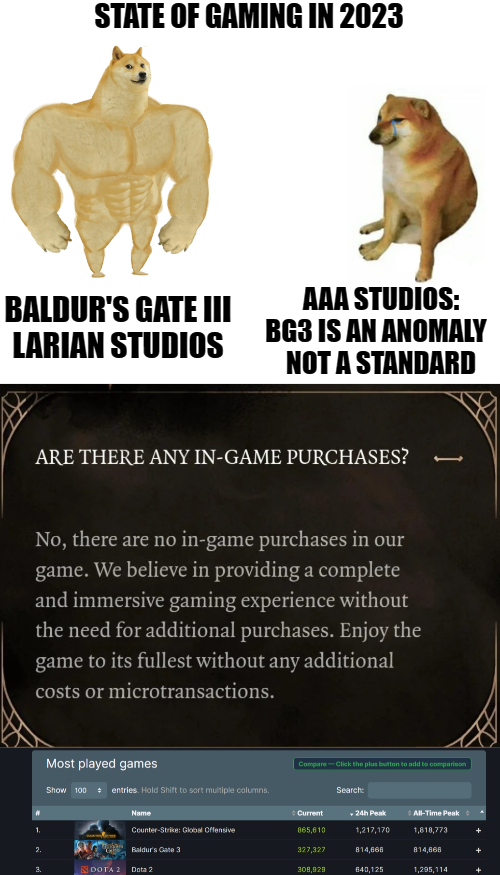

# Most Upvoted Comments Inside the Submission

In [29]:
# Set the maximum column width to 'None' so that the entire content of each cell in the DataFrame is displayed when printed
pd.set_option('display.max_colwidth', None)

# Remove duplicate rows based on both the 'Upvotes' and 'Comment' columns, keeping only the first occurrence of each unique combination
# Reset the index after dropping duplicates
dupedf = dfall.drop_duplicates(
  subset = ['Upvotes', 'Comment'],
  keep = 'first').reset_index(drop = True)

# Sort the DataFrame 'dupedf' by the 'Upvotes' column in descending order and select the top 11 rows
# Store this sorted DataFrame in a new variable called 'bestcomment'
bestcomment = dupedf.sort_values('Upvotes', ascending=False).head(11)

# Display the top 10 rows of the 'bestcomment' DataFrame
bestcomment.head(10)


,Title,URL,Upvotes,Comment,SubmissionDate,CommentDate,Processed_Comment
145569,AAA Studios In 2023 After Baldurs Gate 3 Launch,https://i.redd.it/3923o6vwangb1.png,31391,It might have started with an indie dev but AAA devs are parroting it,2023-08-07 08:04:25,2023-08-07 17:40:52,might start indi dev aaa dev parrot
145915,AAA Studios In 2023 After Baldurs Gate 3 Launch,https://i.redd.it/3923o6vwangb1.png,31391,"> I dunno why people keep pushing the ""it has no microtransactions"".\n\nAs microtransactions over-incentivize companies to make shittier games that are more focused on exploiting gambling addicts and other psychological flaws. When studios literally admit to hiring entire teams of psychologists just to make sure they can scrape every last dollar out of players you can start to understand why microtransactions are so completely fucked?\n\n> Other studios could make great games, have this much success and still have microtransactions that end up making them shitloads more because more people are invested.\n\nThen point to one, including microtransactions literally warps your design paradigm to the point that you can never truly make a good game that isn't in some way negatively impacted by mtx, that doesn't consistently make worse decisions so as to squeeze some $$ out of the player.\n\nPeople harp on it as microtransactions both make for worse products, while also being incredibly harmful and unethical.",2023-08-07 08:04:25,2023-08-07 12:47:59,"> dunno peopl keep push ""it microtransactions"". microtransact over-incentiv compani make shittier game focu exploit gambl addict psycholog flaws. studio liter admit hire entir team psychologist make sure scrape everi last dollar player start understand microtransact complet fucked? > studio could make great games, much success still microtransact end make shitload peopl invested. point one, includ microtransact liter warp design paradigm point never truli make good game way neg impact mtx, consist make wors decis squeez $$ player. peopl harp microtransact make wors products, also incred harm unethical."
145939,AAA Studios In 2023 After Baldurs Gate 3 Launch,https://i.redd.it/3923o6vwangb1.png,31391,"Indie devs don't usually charge 60+$ for their games either, people always expect more from a game with a AAA price tag (for example, No Man's Sky wouldn't have been trashed when it first came out if it had been 15$)",2023-08-07 08:04:25,2023-08-07 20:33:06,"indi dev usual charg 60+$ game either, peopl alway expect game aaa price tag (for example, man' ski trash first come 15$)"
145938,AAA Studios In 2023 After Baldurs Gate 3 Launch,https://i.redd.it/3923o6vwangb1.png,31391,"Everybody spun it my guy. \n\nThe horrible evil devs op is complaining had hot takes like:\n\n""Having a foundation and funding to build things is invaluable.""\n\n""Expecting games to constantly gather further scope and complexity is damaging"".\n\n""Congrats to Larian for decades of hardwork."" \n\nWhat a bunch of lazy assholes. Smh /s",2023-08-07 08:04:25,2023-08-07 14:18:48,"everybodi spin guy. horribl evil dev op complain hot take like: ""have foundat fund build thing invaluable."" ""expect game constantli gather scope complex damaging"". ""congrat larian decad hardwork."" bunch lazi assholes. smh /s"
145937,AAA Studios In 2023 After Baldurs Gate 3 Launch,https://i.redd.it/3923o6vwangb1.png,31391,Yes. They can make way more money with way less effort/investment which is what they care about.,2023-08-07 08:04:25,2023-08-07 18:33:15,yes. make way money way less effort/invest care about.
145936,AAA Studios In 2023 After Baldurs Gate 3 Launch,https://i.redd.it/3923o6vwangb1.png,31391,"I don't think they are right, and neither do they. They are *profitable* and that's all they are concerned with. Maybe not the devs, but the execs at the companies they work for.",2023-08-07 08:04:25,2023-08-07 16:03:17,"think right, neither they. *profitable* that' concern with. mayb devs, exec compani work for."
145935,AAA Studio

# Common Words (top 50)

In [30]:
import nltk
import string

# Load Uncleaned CSV file into a DataFrame
original_freq = pd.read_csv('reddit_dataTotal.csv')
bagOfWords = []

# Create a bag of words without any edits
for comment in original_freq.Comment:
    if pd.notna(comment):
        word = comment.strip().split()
        bagOfWords.extend(word)

# Find the frequencies of each word
frequencies = Counter(bagOfWords)

# Make a DataFrame to graph
original_freqdf = pd.DataFrame(frequencies.items(), columns = ['Term', 'Frequency'])

# Need to sort Dataframe.Frequency by descending for graph
sorted_freqdf = original_freqdf.sort_values('Frequency', ascending = False)

# Grab the top 50 frequent words
top_freqdf = sorted_freqdf.head(50)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


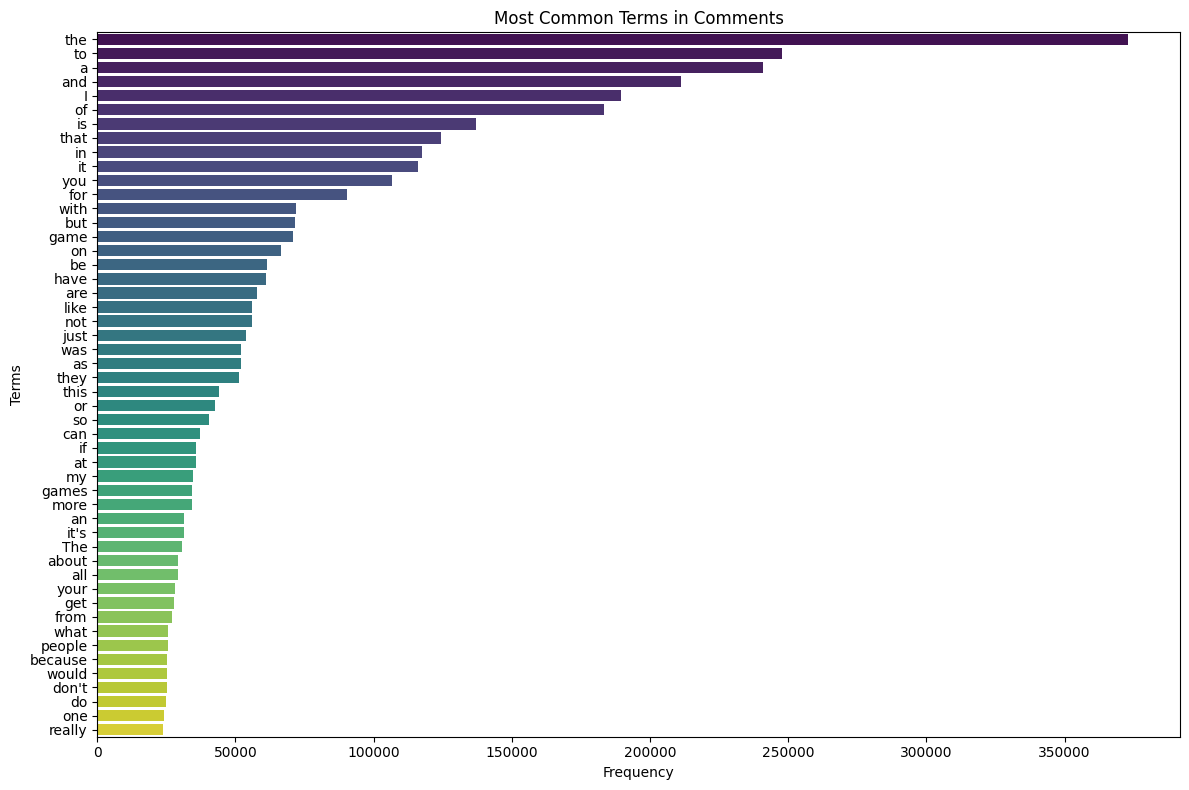

In [408]:
# Create a new figure with specified dimensions (12 units wide by 8 units high)
plt.figure(figsize=(12, 8))

# Create a horizontal bar plot using Seaborn
# The data comes from the DataFrame 'top_freqdf'
# The terms are plotted along the y-axis and their frequencies along the x-axis
# The color palette used is 'viridis'
sns.barplot(y='Term', x='Frequency', data=top_freqdf, orient='h', palette='viridis')

# Label the x-axis as 'Frequency'
plt.xlabel('Frequency')

# Label the y-axis as 'Terms'
plt.ylabel('Terms')

# Add a title to the plot: 'Most Common Terms in Comments'
plt.title('Most Common Terms in Comments')

# Adjust the layout to fit all elements cleanly
plt.tight_layout()

# Display the plot
plt.show()


# Models & Preprocessing

## Imports

In [7]:
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from gensim.corpora import Dictionary
from wordcloud import WordCloud
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import cross_validate

nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
# we are importing RedditProcessing.py and its contents
%aimport RedditProcessing


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


### LDA

In [18]:
# Import necessary modules
import gensim

# Define a function called 'lemmatize_stemming' that takes a text string as input
def lemmatize_stemming(text):
    # Initialize a WordNetLemmatizer object
    lemmatizer = WordNetLemmatizer()
    # Initialize a PorterStemmer object
    stemmer = PorterStemmer()
    
    # Lemmatize and stem each word in the text, and filter out stopwords
    # The 'pos='v'' argument specifies that the word should be lemmatized as a verb
    # The result is a string of lemmatized and stemmed words separated by spaces
    return ' '.join([stemmer.stem(lemmatizer.lemmatize(word, pos='v')) for word in text.split() if word.lower() not in stopwords.words('english')])

# Define a function called 'preprocess' that takes a text string as input
def preprocess(text):
    # Initialize an empty list to store the processed tokens
    result = []
    
    # Tokenize the text using gensim's 'simple_preprocess' function
    # Filter out tokens that are stopwords or shorter than 4 characters
    for token in gensim.utils.simple_preprocess(text):
        if token not in gensim.parsing.preprocessing.STOPWORDS and len(token) > 3:
            # Lemmatize and stem the token using the 'lemmatize_stemming' function
            result.append(lemmatize_stemming(token))
            
    # Return the list of processed tokens
    return result


In [19]:
# Already processed, just need to load the csv

# dfall['Processed_Comment'] = dfall['Comment'].apply(lemmatize_stemming) # applying the function
dfall = pd.read_csv('reddit_dataProcessedSentiments')

In [31]:
dfall.head()
# dfall.to_csv('reddit_dataProcessedSentiments') # Saving processed data frame

,Title,URL,Upvotes,Comment,SubmissionDate,CommentDate,Processed_Comment
0,Baldur's Gate 3 Proves That Pretty Much Everyone Still Wants Single-Player RPGs With No Microtransactions.,https://www.vg247.com/baldurs-gate-3-steam-launch-record-second-biggest-2023,19680,I don't think anyone wants micro transactions,2023-08-04 19:24:06,2023-08-04 20:22:09,think anyon want micro transact
1,Baldur's Gate 3 Proves That Pretty Much Everyone Still Wants Single-Player RPGs With No Microtransactions.,https://www.vg247.com/baldurs-gate-3-steam-launch-record-second-biggest-2023,19680,Co op is a big part for me,2023-08-04 19:24:06,2023-08-04 20:08:17,co op big part
2,Baldur's Gate 3 Proves That Pretty Much Everyone Still Wants Single-Player RPGs With No Microtransactions.,https://www.vg247.com/baldurs-gate-3-steam-launch-record-second-biggest-2023,19680,[removed],2023-08-04 19:24:06,2023-08-04 20:55:22,[removed]
3,Baldur's Gate 3 Proves That Pretty Much Everyone Still Wants Single-Player RPGs With No Microtransactions.,https://www.vg247.com/baldurs-gate-3-steam-launch-record-second-biggest-2023,19680,This was something that absolutely didn't need proving. What a silly title,2023-08-04 19:24:06,2023-08-04 20:36:36,someth absolut need proving. silli titl
4,Baldur's Gate 3 Proves That Pretty Much Everyone Still Wants Single-Player RPGs With No Microtransactions.,https://www.vg247.com/baldurs-gate-3-steam-launch-record-second-biggest-2023,19680,I want multiplayer rpgs with no micro transactions.,2023-08-04 19:24:06,2023-08-04 19:53:47,want multiplay rpg micro transactions.


# LDA Modelling

In [52]:
# Import necessary libraries and modules
import pyLDAvis
import pyLDAvis.gensim_models
from gensim.models import LdaModel

# Initialize a set of English stopwords using the NLTK library
stop_words = set(stopwords.words('english'))

# Define a set of custom stopwords specific to the dataset
custom_stopwords = {'\'', '>', 'i\'v', 'it.', 'that\'', '*', '-', '[deleted]', 'it\'', '+', 'game.', 'de', 'la', 'lo', 'es', 'te', 'en', 'i\'m',
                    'go', 'way', 'also', 'oh', '[removed]', '?', 'un', 'el', 'games.', 'problem.', 'game\'', 'problem', '"game`', "game'", 'x',
                    "can't", '2', '3', '1', 'use', 'get', 'one', 'lot', 'tri', "they'r", 'say', "it'", "there'", '--', 'thank'}

# Update the set of stopwords with the custom stopwords
stop_words.update(custom_stopwords)

# Tokenize the comments in the 'Processed_Comment' column of the DataFrame 'dfall'
# Remove stopwords and store the result in a new column 'tokenized_comments'
tokenized_comments = dfall['Processed_Comment'].apply(lambda x: [word.strip() for word in x.split() if word.strip().lower() not in stop_words])

# Create a Gensim dictionary from the tokenized comments
dictionary = Dictionary(tokenized_comments)

# Create a bag-of-words representation for each document (comment)
corpus = [dictionary.doc2bow(text) for text in tokenized_comments]

# Create an LDA model using the bag-of-words corpus, specifying 4 topics
lda_model = LdaModel(corpus, id2word=dictionary, num_topics=4)

# Print out the top 5 words for each of the 4 topics
topics = lda_model.print_topics(num_words=5)
for topic in topics:
    print(f'Topic {topic[0]}: {topic[1]}')

# Prepare the LDA visualization using pyLDAvis
vis = pyLDAvis.gensim_models.prepare(lda_model, corpus, dictionary)

# Display the LDA visualization
pyLDAvis.display(vis)


Topic 0: 0.047*"game" + 0.011*"peopl" + 0.010*"make" + 0.008*"like" + 0.006*"year"
Topic 1: 0.018*"play" + 0.013*"game" + 0.010*"like" + 0.008*"charact" + 0.008*"time"
Topic 2: 0.009*"skill" + 0.009*"weapon" + 0.008*"level" + 0.006*"dark" + 0.006*"kill"
Topic 3: 0.027*"game" + 0.021*"like" + 0.012*"make" + 0.010*"think" + 0.009*"play"


c:\Users\Admin\AppData\Local\Programs\Python\Python311\Lib\site-packages\wordcloud\wordcloud.py:106: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  self.colormap = plt.cm.get_cmap(colormap)
c:\Users\Admin\AppData\Local\Programs\Python\Python311\Lib\site-packages\wordcloud\wordcloud.py:106: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  self.colormap = plt.cm.get_cmap(colormap)
c:\Users\Admin\AppData\Local\Programs\Python\Python311\Lib\site-packages\wordcloud\wordcloud.py:106: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matp

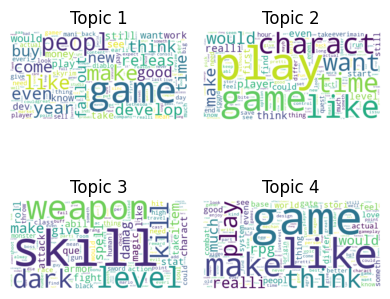

In [54]:
# Number of topics
topicNum = lda_model.num_topics

# Number of word clouds for each row
plotColNum = 2  

# Number of word clouds for each column
plotRowNum = int(topicNum / plotColNum) + (topicNum % plotColNum > 0)

# Initialize figure
plt.figure(figsize=(4, 4))

for topicId in range(topicNum):
    # Get the topic terms
    topic_terms = lda_model.show_topic(topicId, topn=200)
    
    # Create a dictionary 'word -> probability' for the current topic
    word_prob = {}
    for word, prob in topic_terms:
        word_prob[word] = prob

    # Create the WordCloud object
    wordcloud = WordCloud(background_color='white')
    wordcloud.generate_from_frequencies(frequencies=word_prob)
    
    # Add subplot and title, then display the word cloud
    plt.subplot(plotRowNum, plotColNum, topicId + 1)
    plt.title(f'Topic {topicId + 1}')
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')

plt.tight_layout()
plt.show()


In [53]:
def displayWordcloud(model, featureNames):
    """
    Displays the word cloud of the topic distributions, stored in model.

    @param model: lda model.
    @param featureNames: list of strings, representing the list of features/words.
    """

    # this normalises each row/topic to sum to one
    # use this normalisedComponents to display your wordclouds
    normalisedComponents = model.components_ / model.components_.sum(axis=1)[:, np.newaxis]


    
    topicNum = len(model.components_)
    # number of wordclouds for each row
    plotColNum = 3
    # number of wordclouds for each column
    plotRowNum = int(math.ceil(topicNum / plotColNum))

    for topicId, lTopicDist in enumerate(normalisedComponents):
        lWordProb = {featureNames[i] : wordProb for i,wordProb in enumerate(lTopicDist)}
        wordcloud = WordCloud(background_color='black')
        wordcloud.fit_words(frequencies=lWordProb)
        plt.subplot(plotRowNum, plotColNum, topicId+1)
        plt.title('Topic %d:' % (topicId+1))
        plt.imshow(wordcloud, interpolation='bilinear')
        plt.axis("off")

    plt.show(block=True)

# New Word Count

In [385]:
# Initialize a default dictionary to store frequencies
word_frequencies = defaultdict(int)

# Count word frequencies in each document in the corpus
for doc in corpus:
    for id, freq in doc:
        word = dictionary.get(id)
        word_frequencies[word] += freq

# Create a DataFrame from the word frequencies
newfreq = pd.DataFrame({
    'Term': list(word_frequencies.keys()),
    'Frequency': list(word_frequencies.values())
})

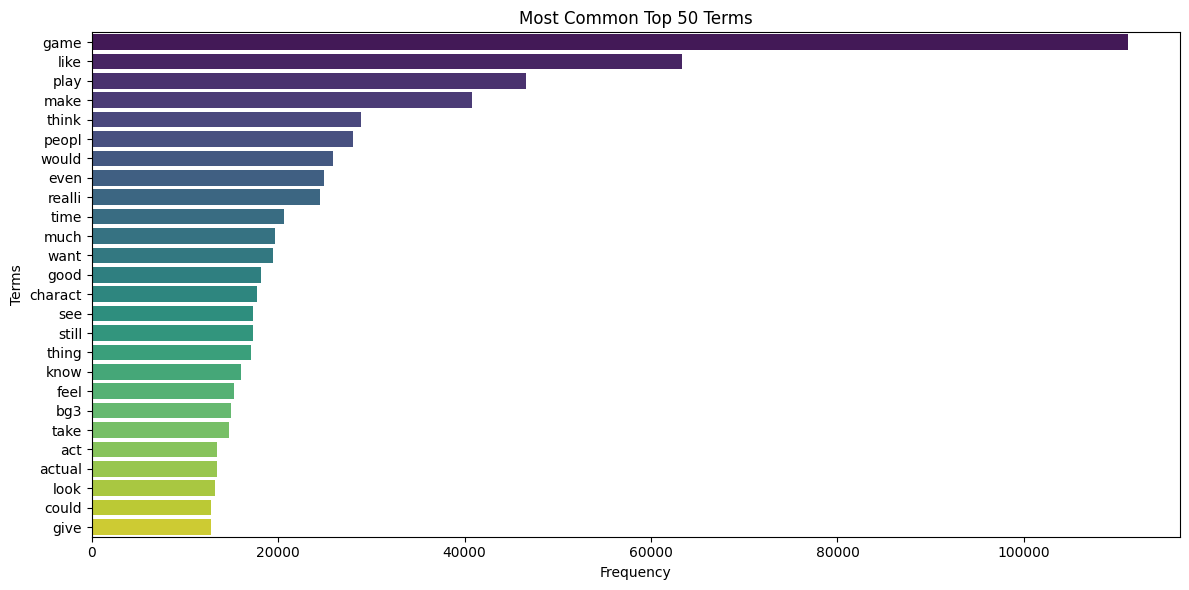

In [389]:
# Sort the DataFrame 'newfreq' by the 'Frequency' column in descending order and select the top 50 rows
# Store the sorted DataFrame in a new variable called 'sorted_freq'
sorted_freq = newfreq.sort_values('Frequency', ascending=False).head(50)

# Initialize a matplotlib figure with specified dimensions (12 units wide by 6 units high)
plt.figure(figsize=(12, 6))

# Create a horizontal bar plot using Seaborn
sns.barplot(y='Term', x='Frequency', data=sorted_freq, orient='h', palette='viridis')

plt.xlabel('Frequency')
plt.ylabel('Terms')
plt.title('Most Common Top 50 Terms')

# Adjust the layout to fit all elements cleanly
plt.tight_layout()
plt.show()


# Sentiment with VADER

In [66]:
# Drop rows from the DataFrame 'dfall' where the 'Comment' column contains NaN (Not a Number) values
# This is done to remove any incomplete or missing data in the 'Comment' column
dfall = dfall.dropna(subset=['Comment'])

# Check for the presence of NaN values in each column of the DataFrame 'dfall'
# The function 'isna()' will return a DataFrame of the same shape as 'dfall', but with Boolean values indicating the presence of NaNs
# The function 'sum()' will then sum these Booleans along each column, effectively counting the number of NaNs in each column
dfall.isna().sum()


Title                0
URL                  0
Upvotes              0
Comment              0
SubmissionDate       0
CommentDate          0
Processed_Comment    0
dtype: int64

In [68]:
# Initialize a SentimentIntensityAnalyzer object
sid = SentimentIntensityAnalyzer()

# Calculate the sentiment score for each comment in the 'Comment' column of the DataFrame 'dfall'
# The 'polarity_scores' method returns a dictionary containing various sentiment metrics, and we extract the 'compound' score
# The 'compound' score is a single float that ranges from -1 (most negative) to +1 (most positive)
# Store these scores in a new column called 'Sentiment_Score'
dfall['Sentiment_Score'] = dfall['Comment'].apply(lambda x: sid.polarity_scores(x)['compound'])

# Label the sentiment based on the 'Sentiment_Score'
# If the score is greater than 0, label it 'positive'
# If the score is equal to 0, label it 'neutral'
# If the score is less than 0, label it 'negative'
# Store these labels in a new column called 'Sentiment_Label'
dfall['Sentiment_Label'] = dfall['Sentiment_Score'].apply(lambda x: 'positive' if x > 0 else ('neutral' if x == 0 else 'negative'))


In [69]:
from nltk.tokenize import word_tokenize
# Tokenize words
def nltk_tokenizer(text):
    return word_tokenize(text)
X = dfall['Comment'].apply(nltk_tokenizer)  # or nltk_tokenizer, etc.


In [70]:
class VaderModel:
    def __init__(self):
        self.m_sentAnalyser = SentimentIntensityAnalyzer()
        
    def get_params(self, deep=True):
        return {}
    
    def fit(self, X, Y):
        pass
    
    def predict(self, X):
        lSentiment = []
        for lTokens in X:
            dSentimentScores = self.m_sentAnalyser.polarity_scores(" ".join(lTokens))
            if dSentimentScores['compound'] < 0:
                lSentiment.append('negative')
            elif dSentimentScores['compound'] > 0:
                lSentiment.append('positive')
            else:
                lSentiment.append('neutral')
        return lSentiment


In [71]:
# Tokenize comments
llReviewTokens = dfall['Comment'].apply(nltk_tokenizer).tolist()

# Initialize VaderModel
vaderModel = VaderModel()

# Define scoring metrics
lScoringMetric = ['precision_micro', 'recall_micro', 'f1_micro']

# Perform cross-validation
lScores = cross_validate(vaderModel, llReviewTokens, y=dfall['Sentiment_Label'], cv=5, 
                         scoring=lScoringMetric, return_train_score=False)

# Display results
print("Average precision: " + str(np.mean(lScores['test_'+lScoringMetric[0]])))
print("Average recall: " + str(np.mean(lScores['test_' + lScoringMetric[1]])))
print("Average F1: " + str(np.mean(lScores['test_' + lScoringMetric[2]])))

Average precision: 0.9823768057386231
Average recall: 0.9823768057386231
Average F1: 0.9823768057386231


In [40]:
dfall.head()

,Title,URL,Upvotes,Comment,SubmissionDate,CommentDate,Processed_Comment
0,Baldur's Gate 3 Proves That Pretty Much Everyone Still Wants Single-Player RPGs With No Microtransactions.,https://www.vg247.com/baldurs-gate-3-steam-launch-record-second-biggest-2023,19680,I don't think anyone wants micro transactions,2023-08-04 19:24:06,2023-08-04 20:22:09,think anyon want micro transact
1,Baldur's Gate 3 Proves That Pretty Much Everyone Still Wants Single-Player RPGs With No Microtransactions.,https://www.vg247.com/baldurs-gate-3-steam-launch-record-second-biggest-2023,19680,Co op is a big part for me,2023-08-04 19:24:06,2023-08-04 20:08:17,co op big part
2,Baldur's Gate 3 Proves That Pretty Much Everyone Still Wants Single-Player RPGs With No Microtransactions.,https://www.vg247.com/baldurs-gate-3-steam-launch-record-second-biggest-2023,19680,[removed],2023-08-04 19:24:06,2023-08-04 20:55:22,[removed]
3,Baldur's Gate 3 Proves That Pretty Much Everyone Still Wants Single-Player RPGs With No Microtransactions.,https://www.vg247.com/baldurs-gate-3-steam-launch-record-second-biggest-2023,19680,This was something that absolutely didn't need proving. What a silly title,2023-08-04 19:24:06,2023-08-04 20:36:36,someth absolut need proving. silli titl
4,Baldur's Gate 3 Proves That Pretty Much Everyone Still Wants Single-Player RPGs With No Microtransactions.,https://www.vg247.com/baldurs-gate-3-steam-launch-record-second-biggest-2023,19680,I want multiplayer rpgs with no micro transactions.,2023-08-04 19:24:06,2023-08-04 19:53:47,want multiplay rpg micro transactions.


# Sentiment Analysis

## - Grouping by Year

In [41]:
sadf = pd.read_csv('reddit_dataProcessedSentiments')

# Convert the 'SubmissionDate' column to datetime format for easier manipulation and analysis
sadf.SubmissionDate = pd.to_datetime(sadf.SubmissionDate)

# Convert the 'CommentDate' column to datetime format for easier manipulation and analysis
sadf.CommentDate = pd.to_datetime(sadf.CommentDate)

sadf.Year = sadf['SubmissionDate'].dt.year

# Extract the year and month from the 'SubmissionDate' column and store it in a new column called 'Month_Year'
# The 'to_period('M')' function will create a period object representing the month and year
sadf.Month_Year = sadf['SubmissionDate'].dt.to_period('M')

# Extract the year and day from the 'SubmissionDate' column and store it in a new column called 'Day_Year'
# The 'to_period('D')' function will create a period object representing the day and year
sadf.Day_Year = sadf['SubmissionDate'].dt.to_period('D')

# Drop the column named 'Unnamed: 0' from the DataFrame
# The 'inplace=True' argument ensures that the DataFrame is modified in place and no new DataFrame is returned
sadf.drop(columns=['Unnamed: 0'], inplace=True)


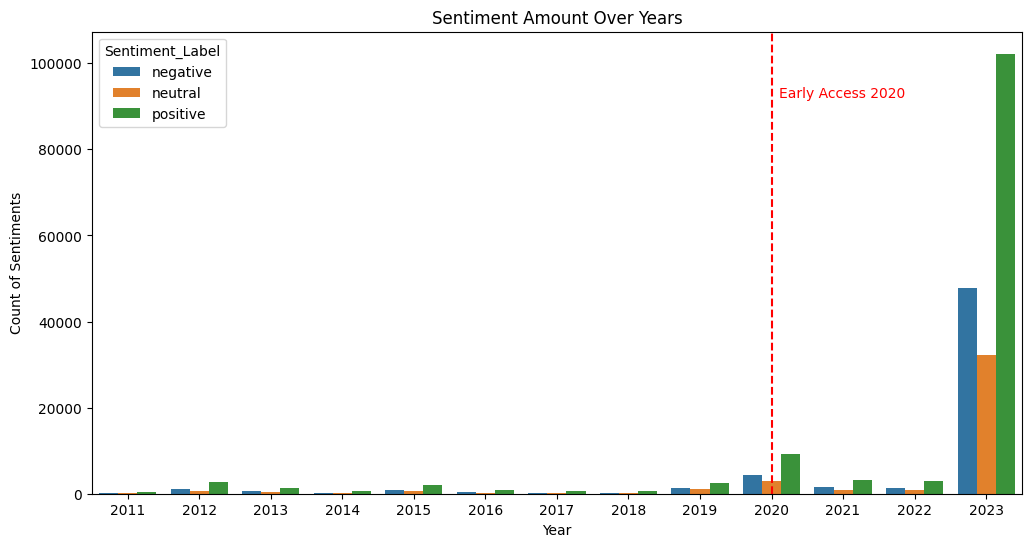

In [45]:
# Group the DataFrame 'sadf' by the 'Year' and 'Sentiment_Label' columns
# Count the number of occurrences for each group and reset the index
# Store the result in a new DataFrame called 'sadf_grouped_by_year_and_sentiment'
sadf_grouped_by_year_and_sentiment = sadf.groupby(['Year', 'Sentiment_Label']).size().reset_index(name='Sentiment_Count')

# Get a sorted list of unique years in the 'sadf_grouped_by_year_and_sentiment' DataFrame
unique_years = sorted(sadf_grouped_by_year_and_sentiment['Year'].unique())

# Find the index of the year 2020 in the sorted list 'unique_years'
early_access_line = unique_years.index(2020)

# Initialize a matplotlib figure with specified dimensions (12 units wide by 6 units high)
plt.figure(figsize=(12, 6))

# Create a bar plot using Seaborn
sns.barplot(data=sadf_grouped_by_year_and_sentiment, x='Year', y='Sentiment_Count', hue='Sentiment_Label')

# Add a vertical dashed line at the position corresponding to the year 2020
plt.axvline(x=early_access_line, color='r', linestyle='--', label='Early Access 2020')

# Find the maximum sentiment count in the DataFrame 'sadf_grouped_by_year_and_sentiment'
max_sentiment_count = sadf_grouped_by_year_and_sentiment['Sentiment_Count'].max()

# Add a text label near the vertical line to indicate 'Early Access 2020'
plt.text(early_access_line + .1, max_sentiment_count * 0.9, 'Early Access 2020', color='red')

plt.title('Sentiment Amount Over Years')
plt.xlabel('Year')
plt.ylabel('Count of Sentiments')
plt.show()


C:\Users\Admin\AppData\Local\Temp\ipykernel_20960\674528211.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['Month_Year'] = filtered_df['Month_Year'].astype(str)


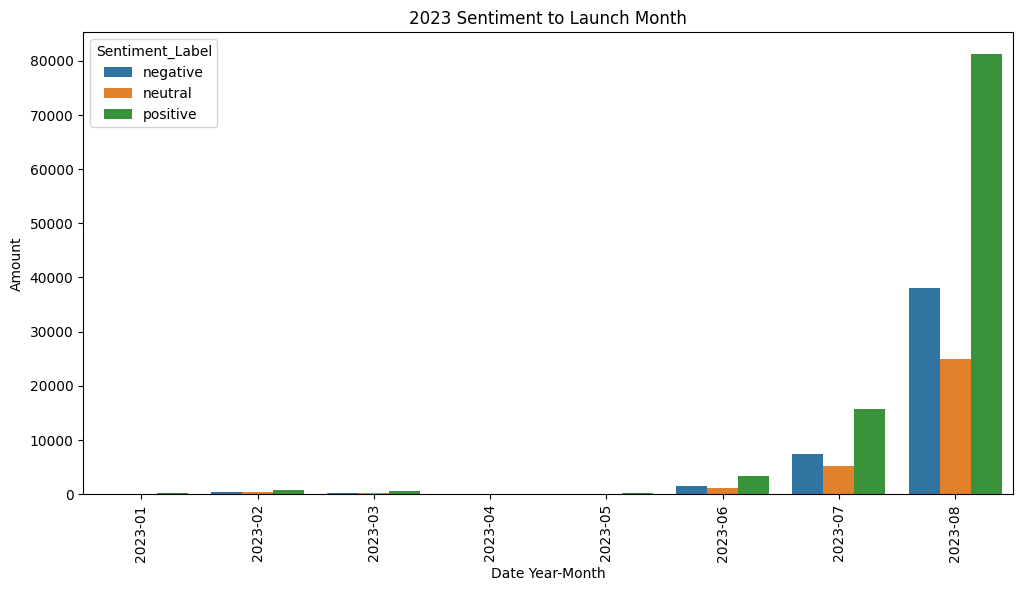

In [46]:
sadf_grouped_by_month_and_sentiment = sadf.groupby(['Month_Year', 'Sentiment_Label']).size().reset_index(name='Sentiment_Count')
filtered_df = sadf_grouped_by_month_and_sentiment[(sadf_grouped_by_month_and_sentiment['Month_Year'] >= "2023-01") & (sadf_grouped_by_month_and_sentiment['Month_Year'] <= "2023-12")]
filtered_df['Month_Year'] = filtered_df['Month_Year'].astype(str)

plt.figure(figsize=(12, 6))
sns.barplot(data=filtered_df, x='Month_Year', y='Sentiment_Count', hue='Sentiment_Label')

plt.title('2023 Sentiment to Launch Month')
plt.xlabel('Date Year-Month')
plt.ylabel('Amount')
plt.xticks(rotation=90)  # Rotate x-axis labels for better visibility
plt.show()

C:\Users\Admin\AppData\Local\Temp\ipykernel_20960\1431217610.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df.sort_values(by='Day_Year', inplace=True)


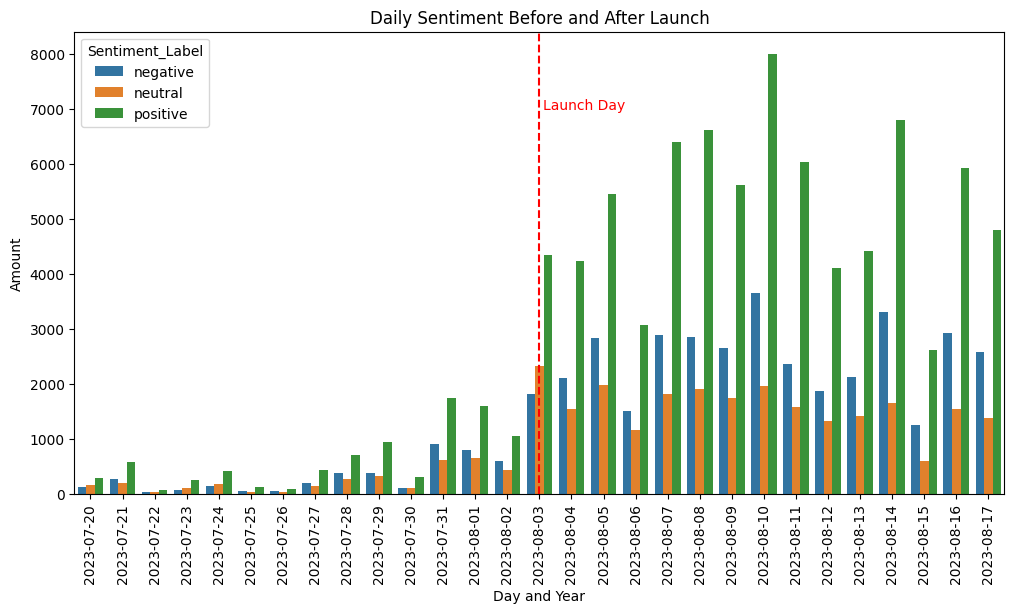

In [47]:
sadf_grouped_by_day_and_sentiment = sadf.groupby(['Day_Year', 'Sentiment_Label']).size().reset_index(name='Sentiment_Count')

# Filter for the year 2023
filtered_df = sadf_grouped_by_day_and_sentiment[(sadf_grouped_by_day_and_sentiment['Day_Year'] >= pd.Period('2023-07-20')) & (sadf_grouped_by_day_and_sentiment['Day_Year'] <= pd.Period('2023-08-17'))]

# Sort Day_Year
filtered_df.sort_values(by='Day_Year', inplace=True)
filtered_df.reset_index(drop=True, inplace=True)
plt.figure(figsize=(12, 6))
sns.barplot(data=filtered_df, x='Day_Year', y='Sentiment_Count', hue='Sentiment_Label')

# Centering August 3, 2023
# Find the index (x-coordinate) corresponding to August 3, 2023

# Draw a vertical line at that position
plt.axvline(x=14, color='r', linestyle='--', label='August 3, 2023')

plt.text(14.1, 7000, 'Launch Day', color='red')

plt.title('Daily Sentiment Before and After Launch')
plt.xlabel('Day and Year')
plt.ylabel('Amount')
plt.xticks(rotation=90)  # Rotate x-axis labels for better visibility
plt.show()

In [48]:
sadfmerged = pd.merge(filtered_df, sadf, on='Day_Year', how='inner')

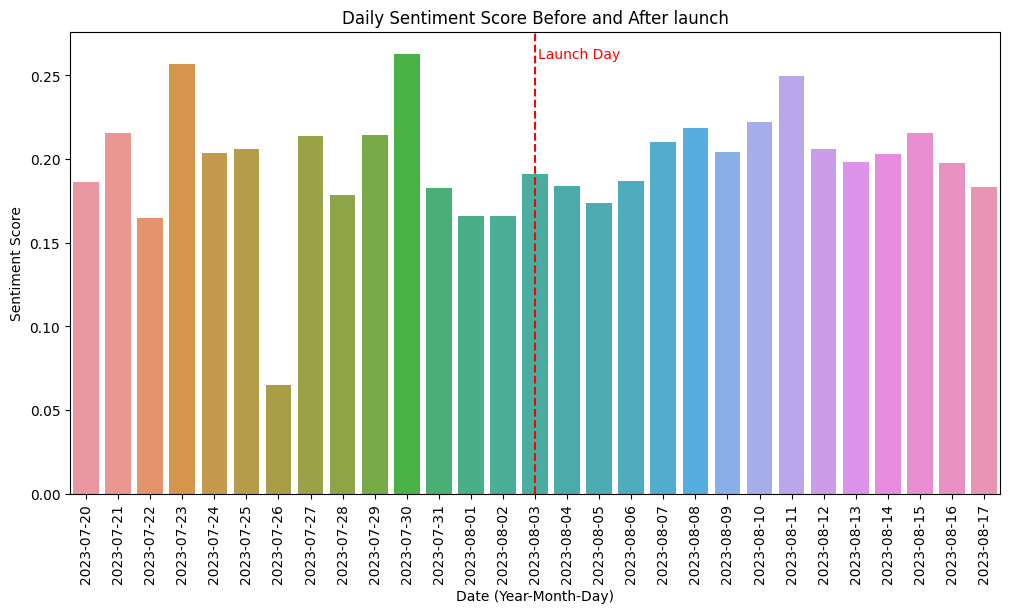

In [49]:

# print(sadfmerged.head())
plt.figure(figsize=(12,6))
plt.xticks(rotation=90)  # Rotate x-axis labels for better visibility
plt.axvline(x=14, color='r', linestyle='--', label='August 3, 2023')
plt.text(14.1, .26, 'Launch Day', color='red')
sns.barplot(data=sadfmerged, x='Day_Year', y='Sentiment_Score', errorbar=None)
plt.title('Daily Sentiment Score Before and After launch')
plt.ylabel('Sentiment Score')
plt.xlabel('Date (Year-Month-Day)')
plt.xticks(rotation=90)
plt.show()

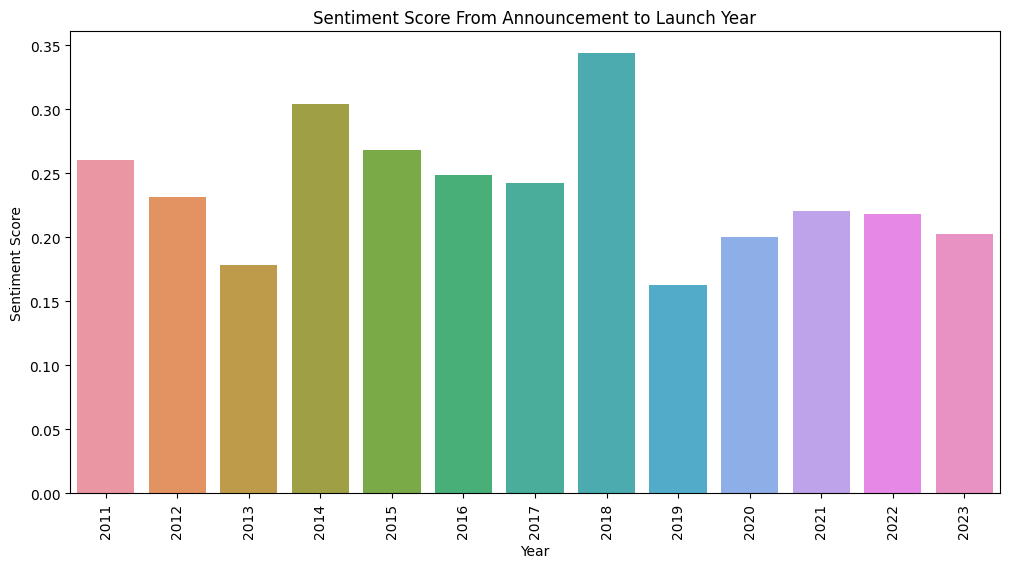

In [50]:
sadf.columns
# filtered_df.columns
# Index(['Day_Year', 'Sentiment_Label', 'Sentiment_Count'], dtype='object')
plt.figure(figsize=(12,6))
sns.barplot(data = sadf, x = 'Year', y = 'Sentiment_Score', errorbar = None)
plt.title('Sentiment Score From Announcement to Launch Year')
plt.ylabel('Sentiment Score')
plt.xticks(rotation=90)  # Rotate x-axis labels for better visibility
plt.show()

In [56]:
# Creating Sample Data
# alldf.head(100).to_csv('100DataSamples.csv')